# Dimensionality Reduction

In [2]:
#imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#needed for reading in cloud data
import glob
from natsort import natsorted

#needed for PCA
from sklearn.decomposition import PCA

import math


In [3]:
#read in demographics df 
mixed_demographics = pd.read_csv('../data:/training_data/mixed_demographics.csv')
mixed_demographics.head()

,Unnamed: 0,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex
0,0,healthy,62.593012,25.312186,161.647749,64.949107,76.057670,137.765801,False
1,1,healthy,58.037959,32.100795,172.543391,94.715477,84.272113,143.459426,False
2,2,pMI,65.840496,26.099055,166.521430,71.650562,75.340419,137.100866,False
3,3,pMI,68.518300,27.672836,166.176884,75.779414,75.697258,140.518093,True
4,4,healthy,55.591381,27.266429,161.314821,70.185424,79.973837,133.740780,False


In [4]:
#read in cloud data

#intialise an empty matrix
data_matrix = np.empty((900,3*18000))
i = 0

#we want to go through each ".npy" file in order
for file in natsorted(glob.glob("../data:/training_data/mixed_samples/*.npy")):

    #make each file in sequence the next row of a matrix
    current_geometry = np.load(file)

    #for j in range(0,10):

    #fill the current row of the matrix
    data_matrix[i] = current_geometry[0,:,0:3].flatten()

    #move to next row of the matrix
    i = i + 1

In [5]:
#displaying this data matrix
data_matrix

array([[-20.157444  ,  17.62280464,   8.63055611, ..., -15.38268089,
        -35.53833008,  59.0874176 ],
       [-18.43087959,   8.44082928,   9.68801403, ..., -14.18277168,
        -39.24963379,  55.86142731],
       [-10.32545853,  19.46612167,   7.9462719 , ..., -10.21153164,
        -28.82172775,  47.76444626],
       ...,
       [-18.01652908,  13.86527252,   9.56795502, ..., -16.46266747,
        -34.26206207,  57.24656296],
       [-10.21624279,  15.62438774,   6.87613201, ..., -13.32351303,
        -34.51303482,  48.27955246],
       [-14.43379879,   6.69717026,   9.58912086, ..., -11.47024632,
        -36.40031433,  47.71577072]], shape=(900, 54000))

In [6]:
#PCA algorithm

#centre and standardise the data
data_centred = (data_matrix - data_matrix.mean()) / data_matrix.std(ddof=0)

#run PCA
pca = PCA()
pca.fit(data_centred)

#collect PCA summary
sd = np.sqrt(pca.explained_variance_)
prop_explained = pca.explained_variance_ratio_
cumulative_explained = np.cumsum(prop_explained)

In [7]:
#create tables for the summary of PCA
summary = pd.DataFrame({
    "Std. dev.": sd,
    "Prop. var": prop_explained,
    "Cumulative. prop": cumulative_explained
}, index=[f"Comp.{i + 1}" for i in range(len(sd))]).round(6)

summary

,Std. dev.,Prop. var,Cumulative. prop
Comp.1,21.081848,0.384489,0.384489
Comp.2,17.333278,0.259913,0.644402
Comp.3,10.825628,0.101385,0.745786
Comp.4,7.544389,0.049240,0.795026
Comp.5,5.536826,0.026521,0.821547
...,...,...,...
Comp.896,0.000321,0.000000,1.000000
Comp.897,0.000299,0.000000,1.000000
Comp.898,0.000272,0.000000,1.000000
Comp.899,0.000210,0.000000,1.000000


In [8]:
loadings = pd.DataFrame(pca.components_.T,
                        columns =[f"Comp.{i + 1}" for i in range(len(sd))],
                        index = [f"{["x","y","z"][i%3]}{math.ceil((i+1)/3)}" for i in range(0,54000)]).round(3)

print("Importance of components:\n", summary, "\n\nLoadings:\n", loadings)


Importance of components:
           Std. dev.  Prop. var  Cumulative. prop
Comp.1    21.081848   0.384489          0.384489
Comp.2    17.333278   0.259913          0.644402
Comp.3    10.825628   0.101385          0.745786
Comp.4     7.544389   0.049240          0.795026
Comp.5     5.536826   0.026521          0.821547
...             ...        ...               ...
Comp.896   0.000321   0.000000          1.000000
Comp.897   0.000299   0.000000          1.000000
Comp.898   0.000272   0.000000          1.000000
Comp.899   0.000210   0.000000          1.000000
Comp.900   0.000000   0.000000          1.000000

[900 rows x 3 columns] 

Loadings:
         Comp.1  Comp.2  Comp.3  Comp.4  Comp.5  Comp.6  Comp.7  Comp.8  \
x1       0.002   0.004   0.005  -0.003   0.000  -0.005  -0.004  -0.006   
y1       0.005   0.003  -0.005  -0.005   0.003  -0.005  -0.005   0.005   
z1       0.004   0.000   0.003   0.004  -0.001   0.001  -0.003   0.007   
x2       0.002   0.004   0.005  -0.003   0.001  -0.0

In [9]:
scores_df

NameError: name 'scores_df' is not defined

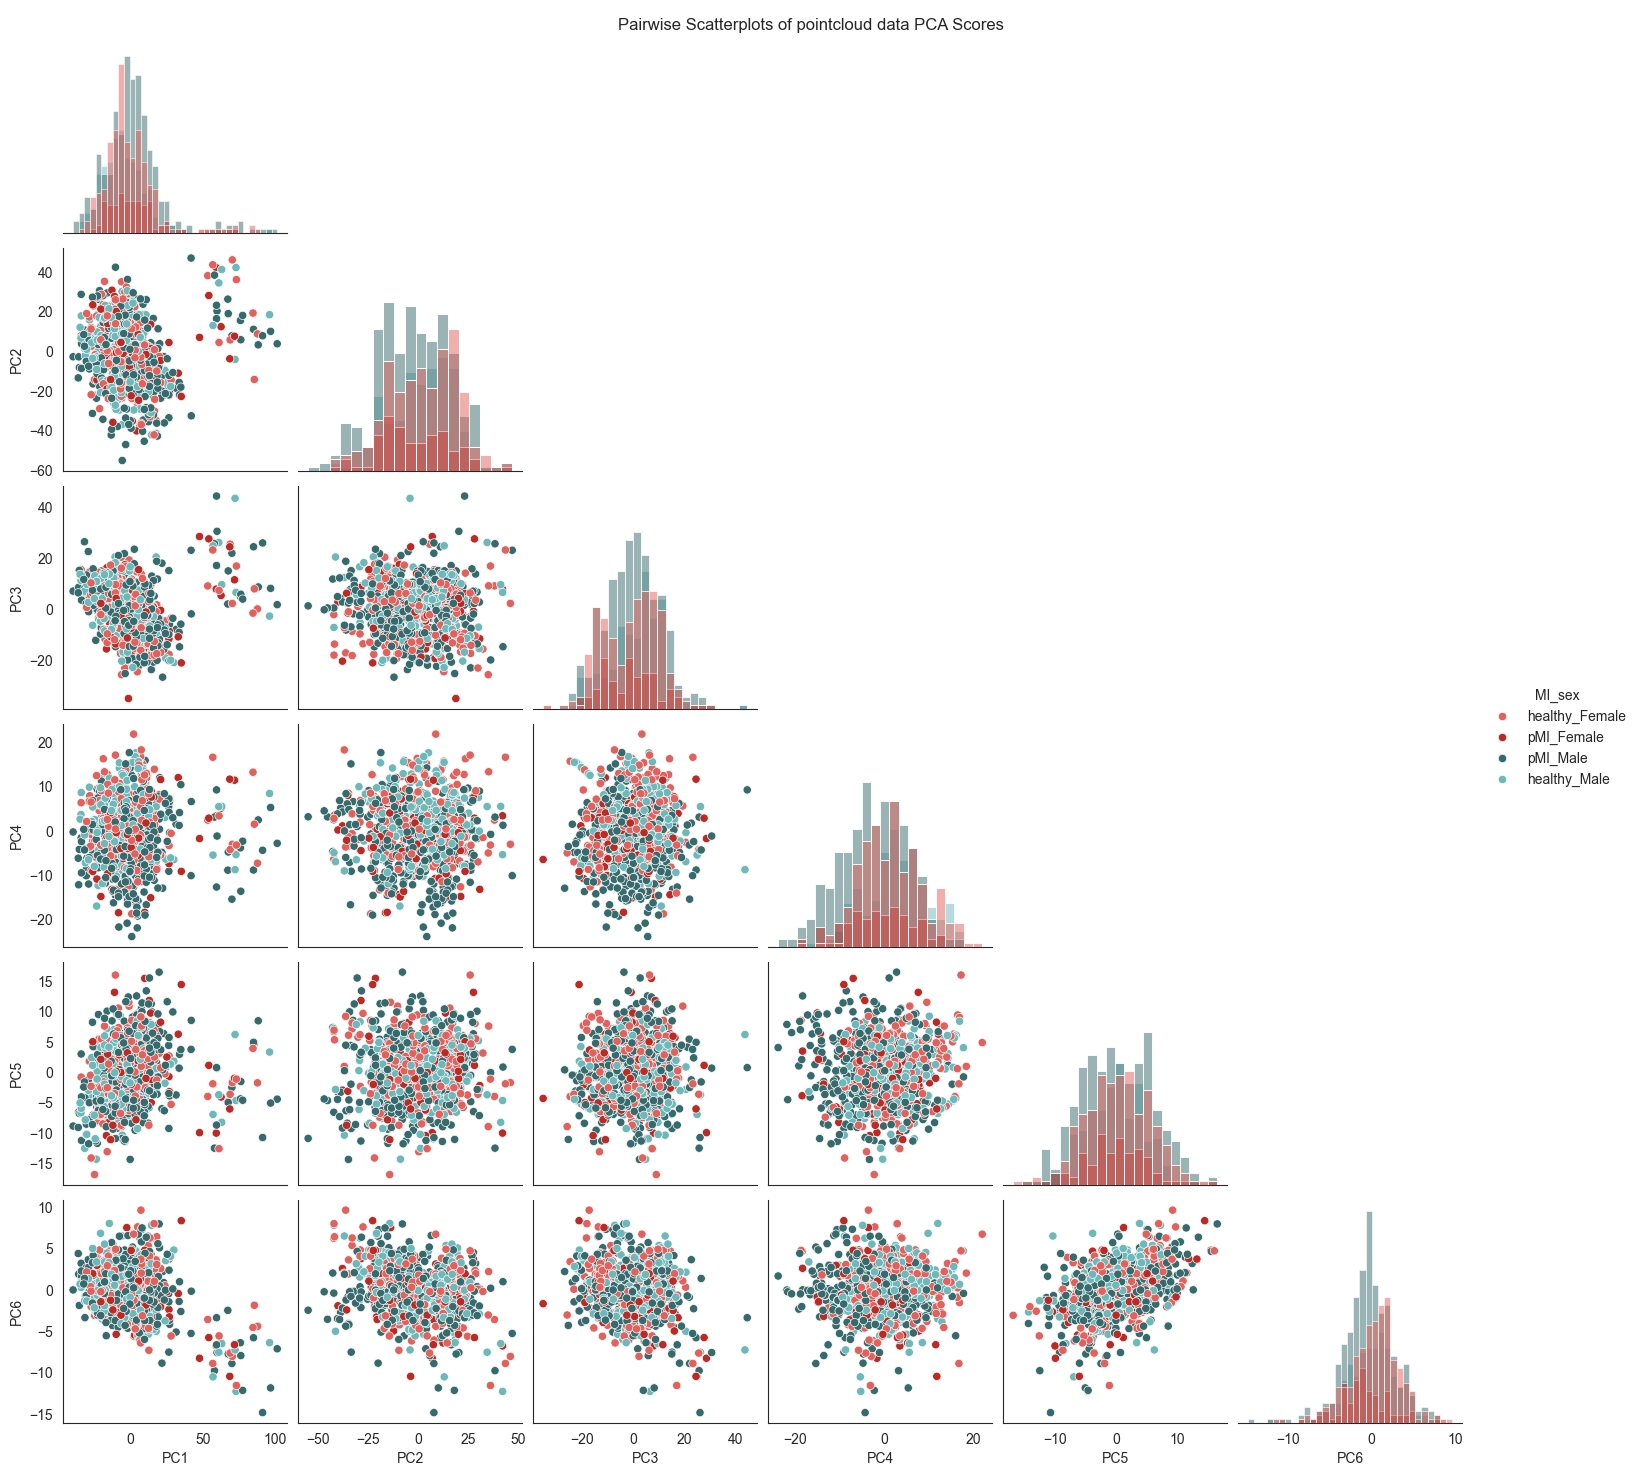

In [44]:
#visualise the first 6 modes using code from slides
scores = pca.transform(data_centred)

#demographics = pd.read_csv('../data:/training_data/mixed_demographics.csv')

#construct dataframe adding demographics and disease status
scores_df = pd.DataFrame(scores[:,0:6], columns = [f"PC{i}" for i in range(1,7)])
scores_df["MI"] = demographics["MI"]
scores_df["sex"] = demographics["sex"]

scores_df["MI_sex"] = scores_df["MI"].astype("str") + '_' + scores_df["sex"].astype("str")

scores_df.drop(658, inplace=True)
#PCs = ["PC1", "PC2", "PC3", "PC4", "PC5"]

sns.set_style("white")
sns.pairplot(scores_df, diag_kind="hist", corner=True, hue='MI_sex', palette=palette)
plt.suptitle("Pairwise Scatterplots of pointcloud data PCA Scores")
plt.show()

In [14]:
scores = pca.transform(data_centred)

for i in range(scores.shape[1]):
    print(max(scores[i]))

26.544840796451908
3.669150264816146
18.62922270899611
26.403997579309618
26.28087108330672
6.2156777037638875
1.7136785244225443
10.898485297986989
7.1578031965609235
9.471973709304024
10.782108248501302
2.6205718394514044
7.959940783553236
8.255471637527581
6.826117859775483
2.6133954054903406
13.375162971859368
17.17394071826891
2.6132072780745284
19.461063906550905
10.700581403809963
14.791340989466875
4.189272051201419
14.581669954558038
41.907519159892644
22.40786401974833
26.31185540659422
9.676270200865734
17.90394233602882
26.267653576807334
7.320993093126569
23.042523813995984
20.981215157783396
15.51512588901937
16.254701831109656
7.294189846069623
16.080148551005436
14.261986768794898
12.869020556499265
10.737045599821215
7.803048131165781
6.57977192207997
4.864268300755128
18.01210629234228
17.779446265110508
9.947325349830457
9.419349288434518
15.443997449046805
26.921331506892813
10.06907823107964
6.010059093050763
29.822247797595494
15.358763653724822
16.488250713951047

In [15]:
scores_df.drop(658).iloc[scores_df.idxmax()]

KeyError: '[658] not found in axis'

InvalidIndexError: (slice(None, None, None), slice(0, 6, None))

In [51]:
#visualisations including demographics for each point (code from slides)
pd.read_csv('../data:/training_data/mixed_demographics.csv')["MI"]

0      healthy
1      healthy
2          pMI
3          pMI
4      healthy
        ...   
895        pMI
896    healthy
897        pMI
898        pMI
899    healthy
Name: MI, Length: 900, dtype: object

In [74]:
#investigate variation explained by the PCs
scores_df.iloc[:,0:6]

,0,1,2,3,4,5
0,26.544841,-22.133676,-17.761126,-3.285480,2.703046,3.729136
1,-4.510047,-19.204096,3.669150,-0.530089,-7.433774,-0.838350
2,8.676426,18.629223,-4.044623,-6.309775,0.595439,-3.300951
3,26.403998,-33.427237,15.144753,-9.087598,-9.189939,-7.494998
4,-7.093070,26.280871,-17.404162,-5.076295,2.170934,1.003836
...,...,...,...,...,...,...
895,-0.531949,1.072282,10.825416,-9.136009,0.300636,-1.679012
896,-16.190148,17.920385,-9.739484,2.610835,-2.508686,2.952210
897,13.010837,-12.186836,-7.840668,9.402652,3.978140,0.018429
898,-4.878754,9.036972,-0.499647,-5.666964,4.826614,-2.215328


## demographic pca 

In [41]:
demographics = pd.read_csv('../data:/training_data/mixed_demographics.csv')

demographics["sex"] = demographics["sex"].replace({True: "Male", False: "Female"})
demographics.head()

,Unnamed: 0,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex
0,0,healthy,62.593012,25.312186,161.647749,64.949107,76.057670,137.765801,Female
1,1,healthy,58.037959,32.100795,172.543391,94.715477,84.272113,143.459426,Female
2,2,pMI,65.840496,26.099055,166.521430,71.650562,75.340419,137.100866,Female
3,3,pMI,68.518300,27.672836,166.176884,75.779414,75.697258,140.518093,Male
4,4,healthy,55.591381,27.266429,161.314821,70.185424,79.973837,133.740780,Female


In [42]:
demographics.drop(labels = ["Unnamed: 0"], axis=1, inplace=True)
demographics.head()

,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex
0,healthy,62.593012,25.312186,161.647749,64.949107,76.057670,137.765801,Female
1,healthy,58.037959,32.100795,172.543391,94.715477,84.272113,143.459426,Female
2,pMI,65.840496,26.099055,166.521430,71.650562,75.340419,137.100866,Female
3,pMI,68.518300,27.672836,166.176884,75.779414,75.697258,140.518093,Male
4,healthy,55.591381,27.266429,161.314821,70.185424,79.973837,133.740780,Female


In [18]:
#PCA algorithm
numeric_feature_columns = demographics.select_dtypes(include=np.number).columns.tolist()


#centre and standardise the data
demo_data_centred = (demographics[numeric_feature_columns] - demographics[numeric_feature_columns].mean()) / demographics[numeric_feature_columns].std(ddof=0)

#run PCA
pca_demo = PCA()
pca_demo.fit(demo_data_centred)

#collect PCA summary
sd = np.sqrt(pca_demo.explained_variance_)
prop_explained = pca_demo.explained_variance_ratio_
cumulative_explained = np.cumsum(prop_explained)

In [19]:
#create tables for the summary of PCA
summary = pd.DataFrame({
    "Std. dev.": sd,
    "Prop. var": prop_explained,
    "Cumulative. prop": cumulative_explained
}, index=[f"Comp.{i + 1}" for i in range(len(sd))]).round(6)

summary

,Std. dev.,Prop. var,Cumulative. prop
Comp.1,1.744054,0.506391,0.506391
Comp.2,1.188328,0.235092,0.741483
Comp.3,0.958264,0.152875,0.894358
Comp.4,0.629388,0.065948,0.960306
Comp.5,0.487283,0.039530,0.999836
Comp.6,0.031375,0.000164,1.000000


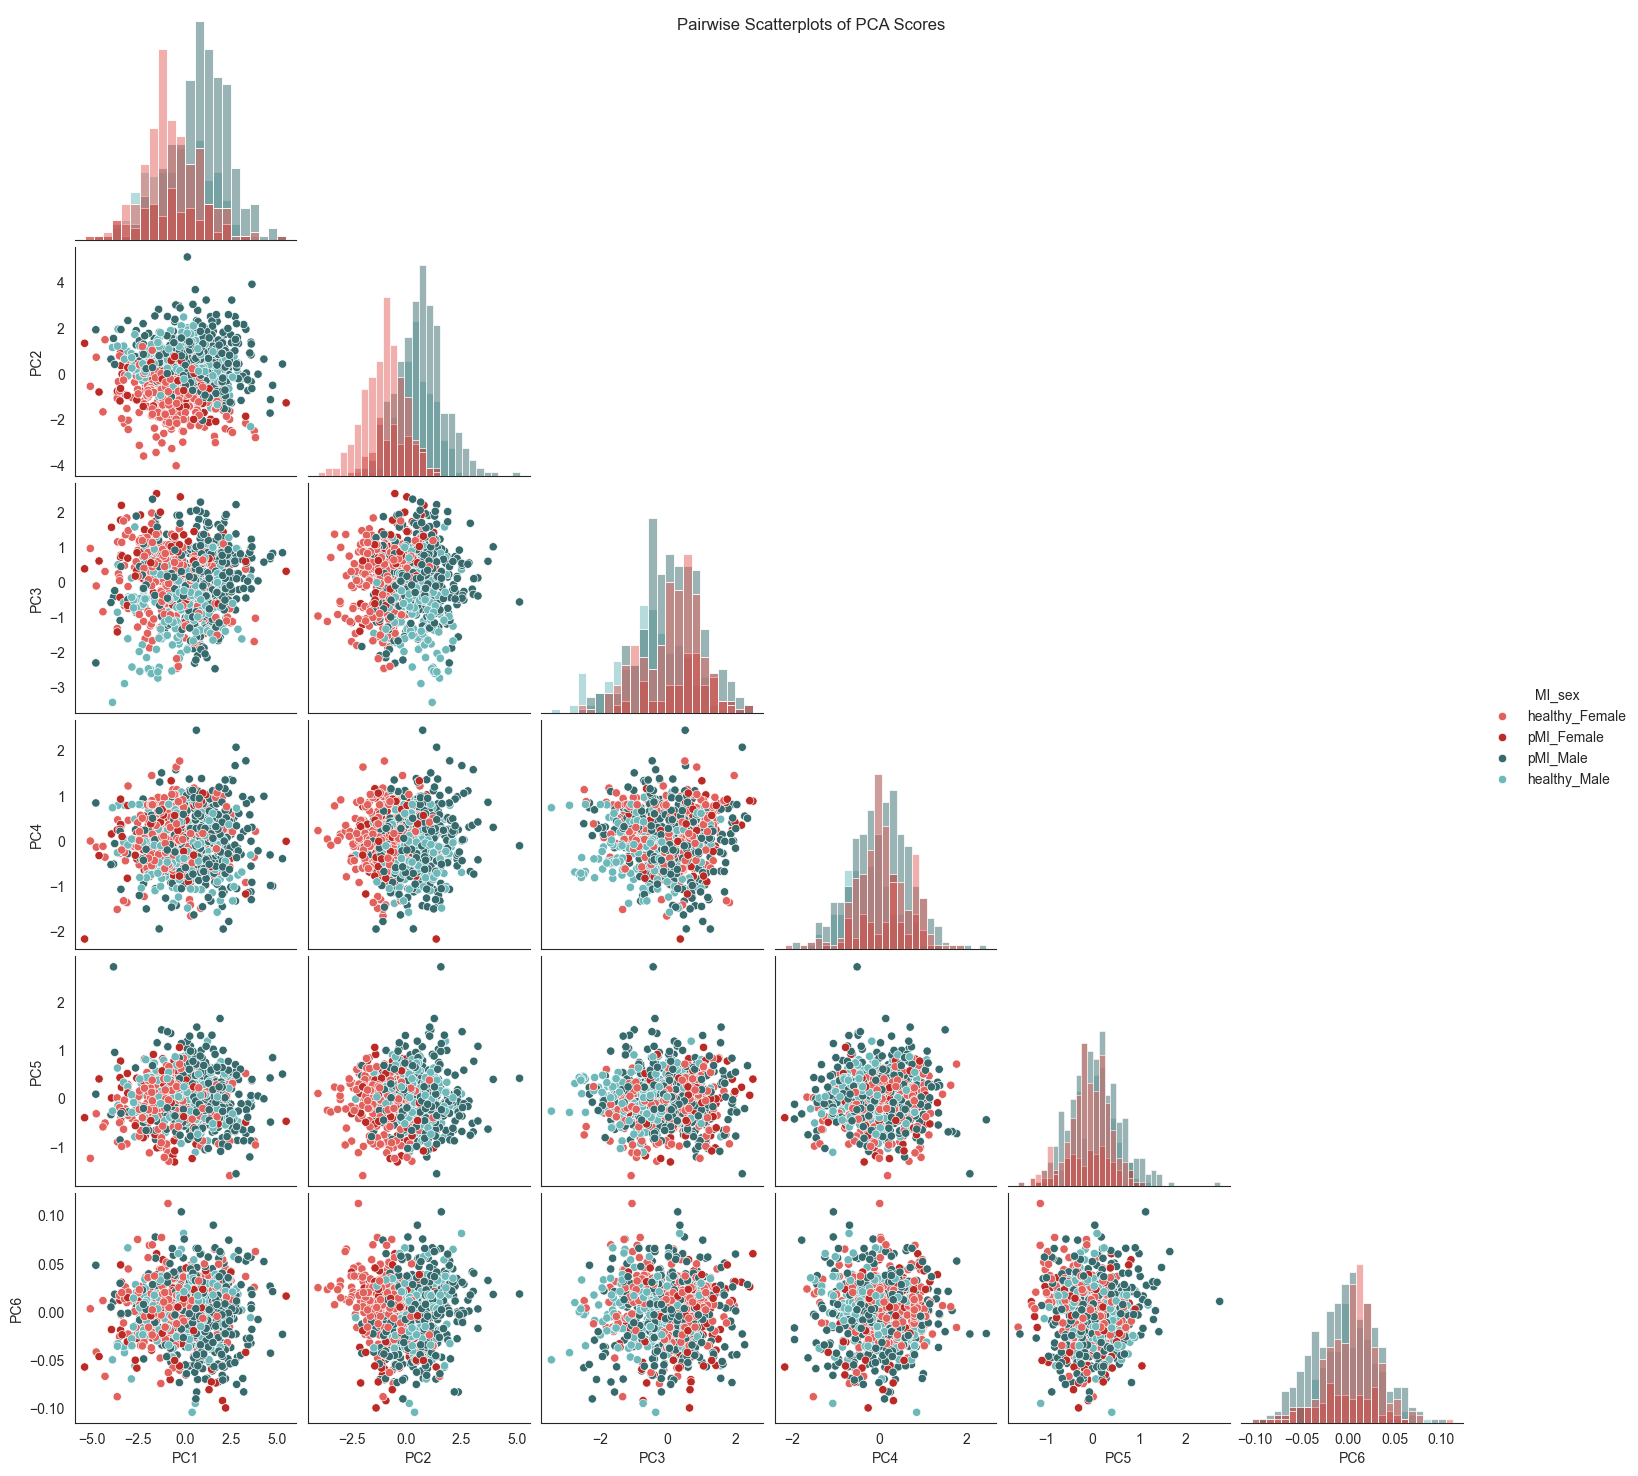

In [31]:
#visualise the first 6 modes using code from slides
scores = pca_demo.transform(demo_data_centred)


#construct dataframe adding demographics and disease status
scores_df = pd.DataFrame(scores[:,0:6], columns = [f"PC{i}" for i in range(1,7)])
scores_df["MI"] = demographics["MI"]
scores_df["sex"] = demographics["sex"]

scores_df["MI_sex"] = scores_df["MI"].astype(str) + "_" + scores_df["sex"]


scores_df.drop(658, inplace=True)
#PCs = ["PC1", "PC2", "PC3", "PC4", "PC5"]
palette = {
    "healthy_Male": "#6EB8BA",
    "healthy_Female": "#E3615C",
    "pMI_Male": "#376A6C",
    "pMI_Female": "#BB2A25"
}

sns.set_style("white")
sns.pairplot(scores_df, diag_kind="hist", corner=True, hue='MI_sex', palette=palette)
plt.suptitle("Pairwise Scatterplots of PCA Scores")
plt.show()

In [28]:
#removing outliers 

outlier_indices = [57,  75, 113, 138, 139, 172, 174, 289, 292, 308, 326, 335, 378, 385, 400, 424, 426, 439,
 445, 503, 508, 573, 591, 601, 658, 666, 673, 693, 699, 722, 754, 776, 793, 814, 822, 841,
 846, 875]

None


In [36]:
#centre and standardise the data
demo_data_centred_minout = (demographics[numeric_feature_columns] - demographics[numeric_feature_columns].mean()) / demographics[numeric_feature_columns].std(ddof=0)
demo_data_centred_minout = demo_data_centred_minout.drop(index=outlier_indices)

#run PCA
pca_demo2 = PCA()
pca_demo2.fit(demo_data_centred_minout)

#collect PCA summary
sd = np.sqrt(pca_demo2.explained_variance_)
prop_explained = pca_demo2.explained_variance_ratio_
cumulative_explained = np.cumsum(prop_explained)

In [37]:
#create tables for the summary of PCA
summary = pd.DataFrame({
    "Std. dev.": sd,
    "Prop. var": prop_explained,
    "Cumulative. prop": cumulative_explained
}, index=[f"Comp.{i + 1}" for i in range(len(sd))]).round(6)

summary

,Std. dev.,Prop. var,Cumulative. prop
Comp.1,1.746543,0.507234,0.507234
Comp.2,1.182813,0.232639,0.739872
Comp.3,0.962482,0.154041,0.893913
Comp.4,0.633138,0.066657,0.960570
Comp.5,0.485956,0.039268,0.999839
Comp.6,0.031150,0.000161,1.000000


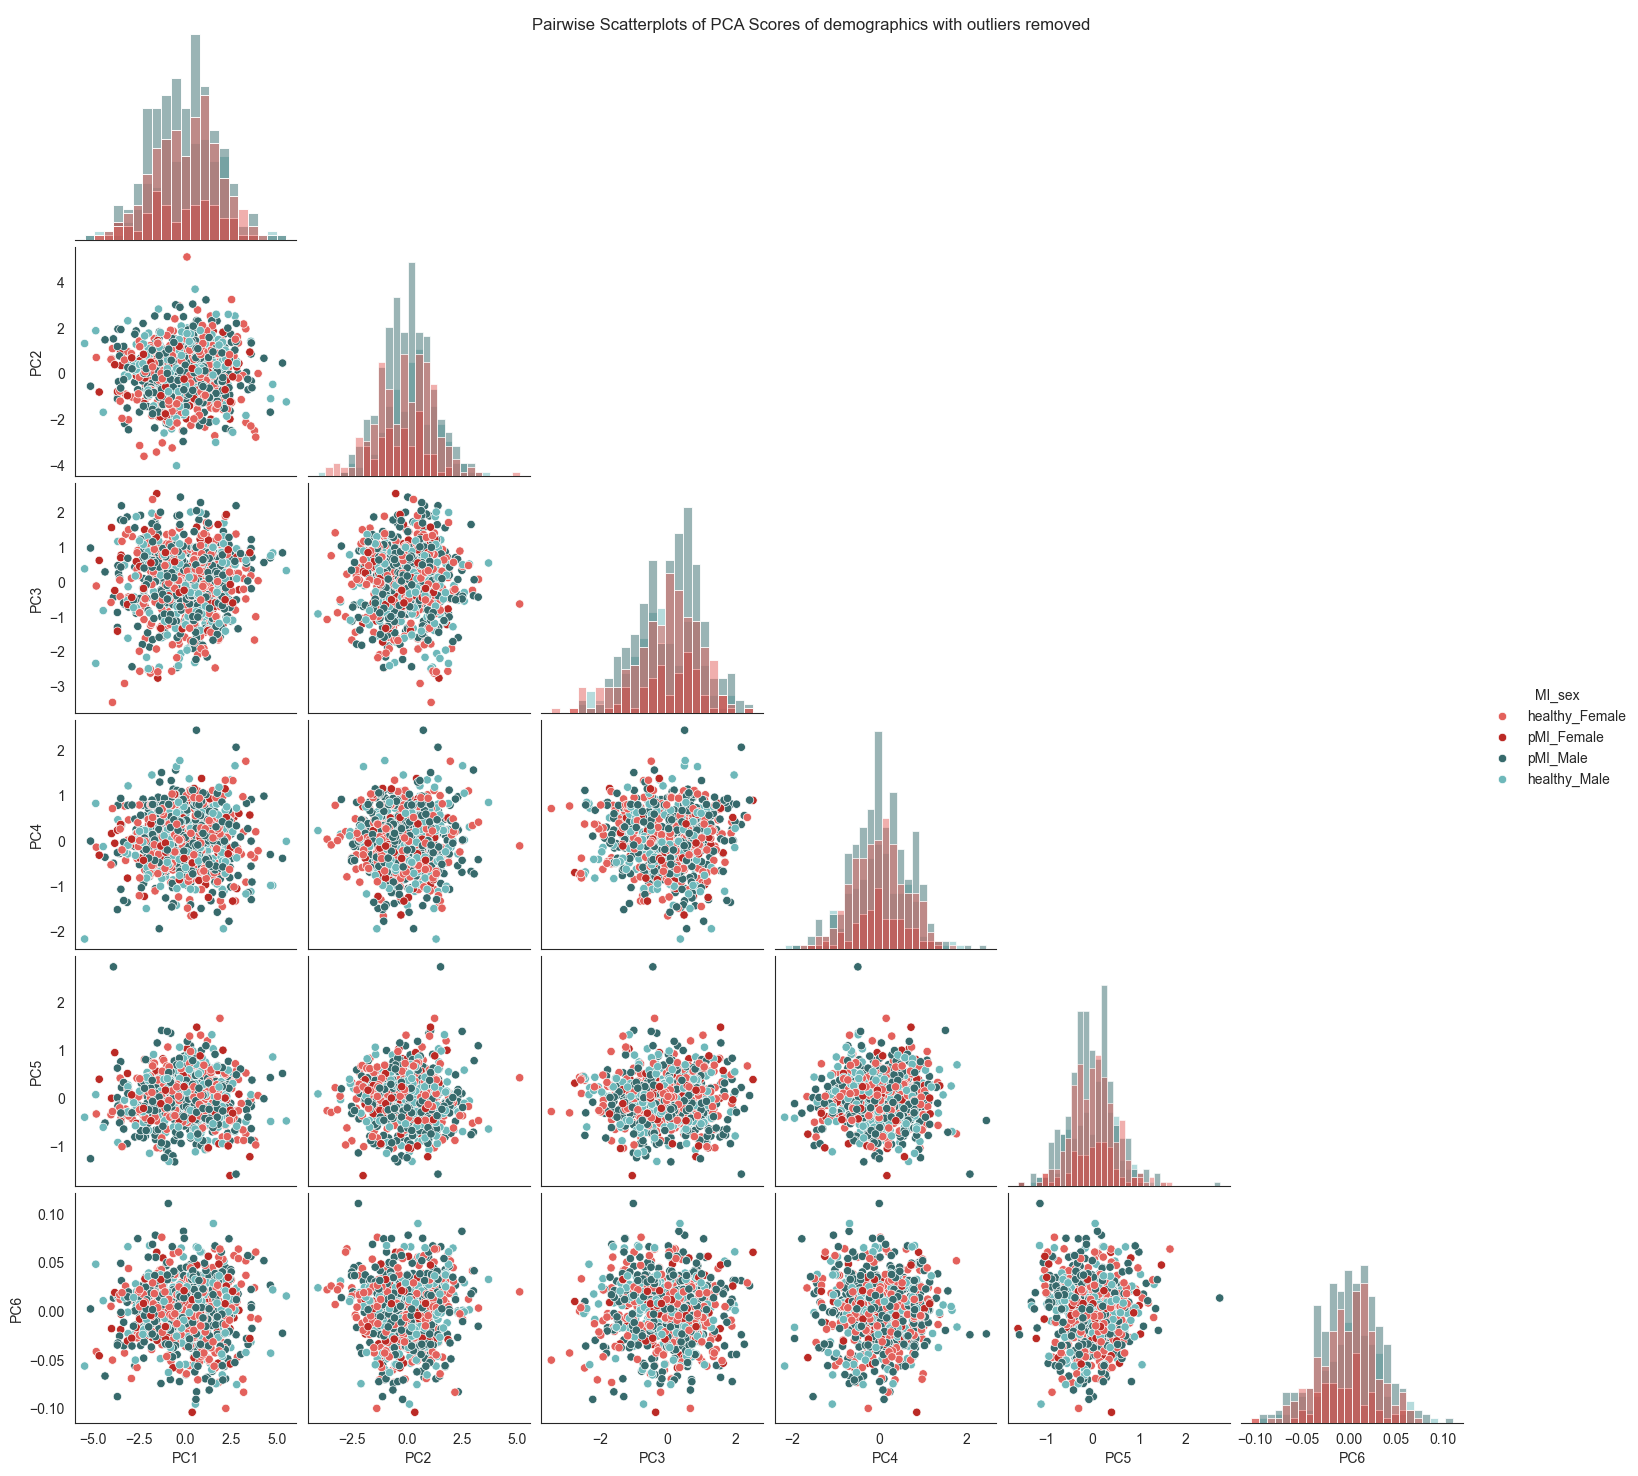

In [39]:
#visualise the first 6 modes using code from slides
scores = pca_demo2.transform(demo_data_centred_minout)


#construct dataframe adding demographics and disease status
scores_df = pd.DataFrame(scores[:,0:6], columns = [f"PC{i}" for i in range(1,7)])
scores_df["MI"] = demographics["MI"]
scores_df["sex"] = demographics["sex"]

scores_df["MI_sex"] = scores_df["MI"].astype(str) + "_" + scores_df["sex"]


scores_df.drop(658, inplace=True)
#PCs = ["PC1", "PC2", "PC3", "PC4", "PC5"]
palette = {
    "healthy_Male": "#6EB8BA",
    "healthy_Female": "#E3615C",
    "pMI_Male": "#376A6C",
    "pMI_Female": "#BB2A25"
}

sns.set_style("white")
sns.pairplot(scores_df, diag_kind="hist", corner=True, hue='MI_sex', palette=palette)
plt.suptitle("Pairwise Scatterplots of PCA Scores of demographics with outliers removed")
plt.show()